# T-test on average HFB amplitude values during speech and non-speech fragments

The grid plot in the paper is plotted on the cortex (Figure 1b)

In [14]:
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.stats import ttest_ind
from utils import load_fragment_times, zscore
%matplotlib inline

In [3]:
hdir = '..'
speech = load_fragment_times(hdir, 'speech')
nonspeech = load_fragment_times(hdir, 'nonspeech')

In [5]:
subj = 's1'
grid = np.load('../data/' + subj + '_HD_grid.npy')
x    = np.load('../data/' + subj + '_HD_100Hz_hfb.npy')
#  x = zscore(x)
n = x.shape[-1]

In [6]:
d_spe, d_non = [], []
for spe_frag, non_frag in zip(speech, nonspeech):
        d_spe.append(np.mean(x[spe_frag[0]:spe_frag[1]], 0))
        d_non.append(np.mean(x[non_frag[0]:non_frag[1]], 0))

d_spe, d_non = map(np.array, [d_spe, d_non])

In [15]:
# T-test
ts, ps = np.zeros(x.shape[-1]), np.zeros(x.shape[-1])
for i in range(x.shape[-1]):
    ts[i], ps[i] = ttest_ind(d_spe[:, i], d_non[:, i])

In [16]:
# Significance level
alpha = .05
thresh_05 = alpha/n
pmask = np.where(ps<alpha)[0]
pmask_bonf = np.where(ps<thresh_05)[0]
ts_masked = ts.copy()
ts_masked[np.setdiff1d(range(n), pmask_bonf)] = 0

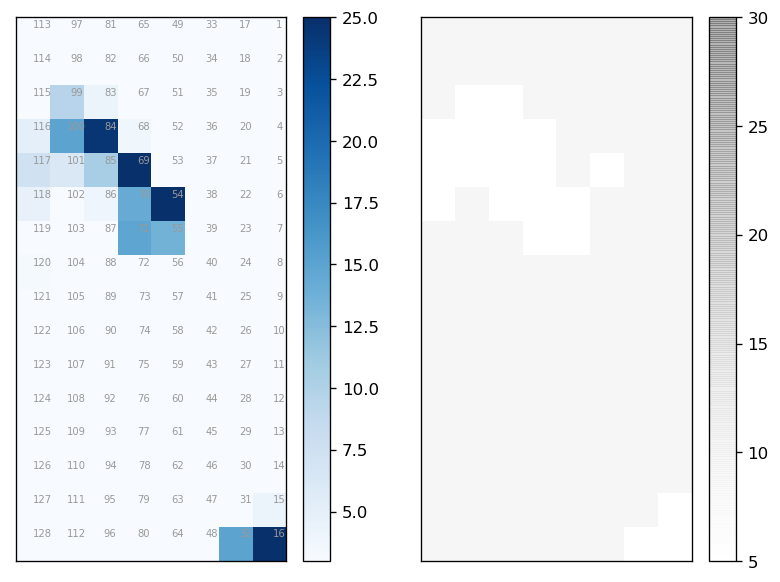

In [17]:
# Plot for s1
plt.figure(figsize=(8, 6), dpi=120)
cmap = plt.get_cmap('Blues')
cmap.set_bad((.7, .7, .7))
plt.subplot(121)
plt.imshow(ts[grid], aspect='auto', cmap = cmap, vmin = 3, vmax = 25, extent=[0, grid.shape[-1], 0, grid.shape[0]])
for (i, j), k in np.ndenumerate(np.flipud(grid)):
    plt.gca().text(j+.8, i+.8, k+1, ha='center', va='center', color=(.6, .6, .6), fontsize=6)
plt.xticks([])
plt.yticks([])
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.colorbar()

cmap_mask = cm.get_cmap('Greys')
cmap_mask.set_under('w', alpha=0)

ts_mask = ts.copy()
ts_mask[np.where(ps>=thresh_05)[0]] = 10
ts_mask[np.where(ps<thresh_05)[0]] = -100
plt.subplot(122)
plt.imshow(ts_mask[grid], aspect='auto', cmap = cmap_mask, alpha = .3, clim=[5, 30],
           interpolation='none',extent=[0, grid.shape[-1], 0, grid.shape[0]])
plt.xticks([])
plt.yticks([])
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.colorbar()

plt.show()